In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set_style('whitegrid')

In [16]:
df = pd.read_csv('dataset/crime.csv')
df['counter'] = 1
lb_make = LabelEncoder()
#df["HUNDRED_BLOCK"] = df["HUNDRED_BLOCK"].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
df['NEIGHBOURHOOD_CODE'] = lb_make.fit_transform(df['NEIGHBOURHOOD'].astype(str))

In [17]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,counter,NEIGHBOURHOOD_CODE
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,19


# What are the various types of crime

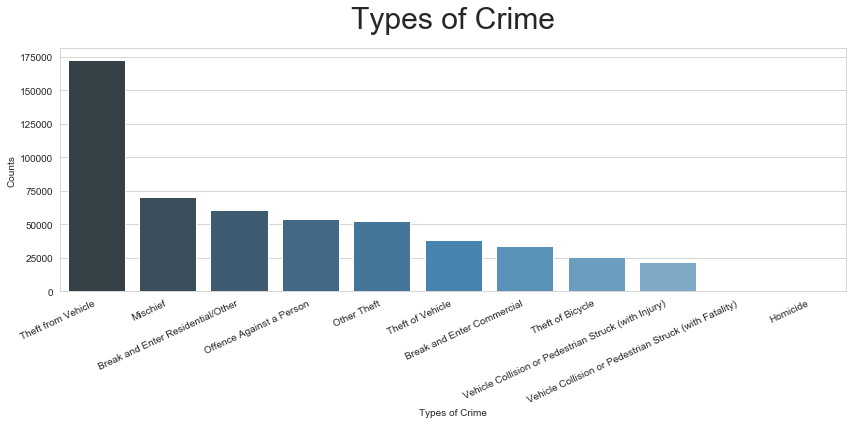

In [18]:
plt.figure(figsize=(12,6))
plt.title('Types of Crime',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='TYPE',data=df,palette='Blues_d', order = df['TYPE'].value_counts().index)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

# Trends over the years of the crime in Vancouver

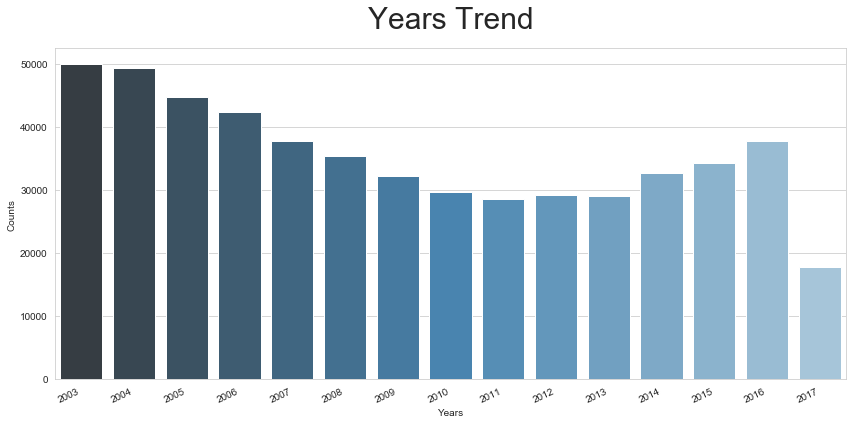

In [19]:
plt.figure(figsize=(12,6))
plt.title('Years Trend',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='YEAR',data=df,palette='Blues_d')
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

# 5 safest area to live in Vancouver

In [20]:
df.groupby(['NEIGHBOURHOOD']).count()['counter'].sort_values(ascending=True).head(5)

NEIGHBOURHOOD
Musqueam            532
Stanley Park       3775
South Cambie       5212
Shaughnessy        5426
West Point Grey    5871
Name: counter, dtype: int64